#### Libraries importeren

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas.plotting import scatter_matrix
import pingouin as pg


#### Inline render functie voor notebook
"Line magic":

https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained

In [51]:
%matplotlib inline

#### Csv inlezen, kolommen verwijderen die geen features bevatten en bekijken


In [52]:
df = pd.read_csv('Airlinesatisfaction.csv')

df = df.drop(columns = ["Unnamed: 0", "id"], axis=1)

df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

#### Codeer de objects in de kolommen

In [53]:
df['satisfaction'].replace(     {'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
df['Class'].replace(            {'Eco': 1, 'Eco Plus': 2, 'Business':3},        inplace=True)
df['Customer Type'].replace(    {'disloyal Customer': 0, 'Loyal Customer': 1},  inplace=True)
df['Gender'].replace(           {'Male': 0, 'Female': 1},                       inplace=True)
df['Type of Travel'].replace(   {'Personal Travel': 0, 'Business travel': 1},   inplace=True)

#### Histogrammen maken

array([[<AxesSubplot:title={'center':'Departure Delay in Minutes'}>]],
      dtype=object)

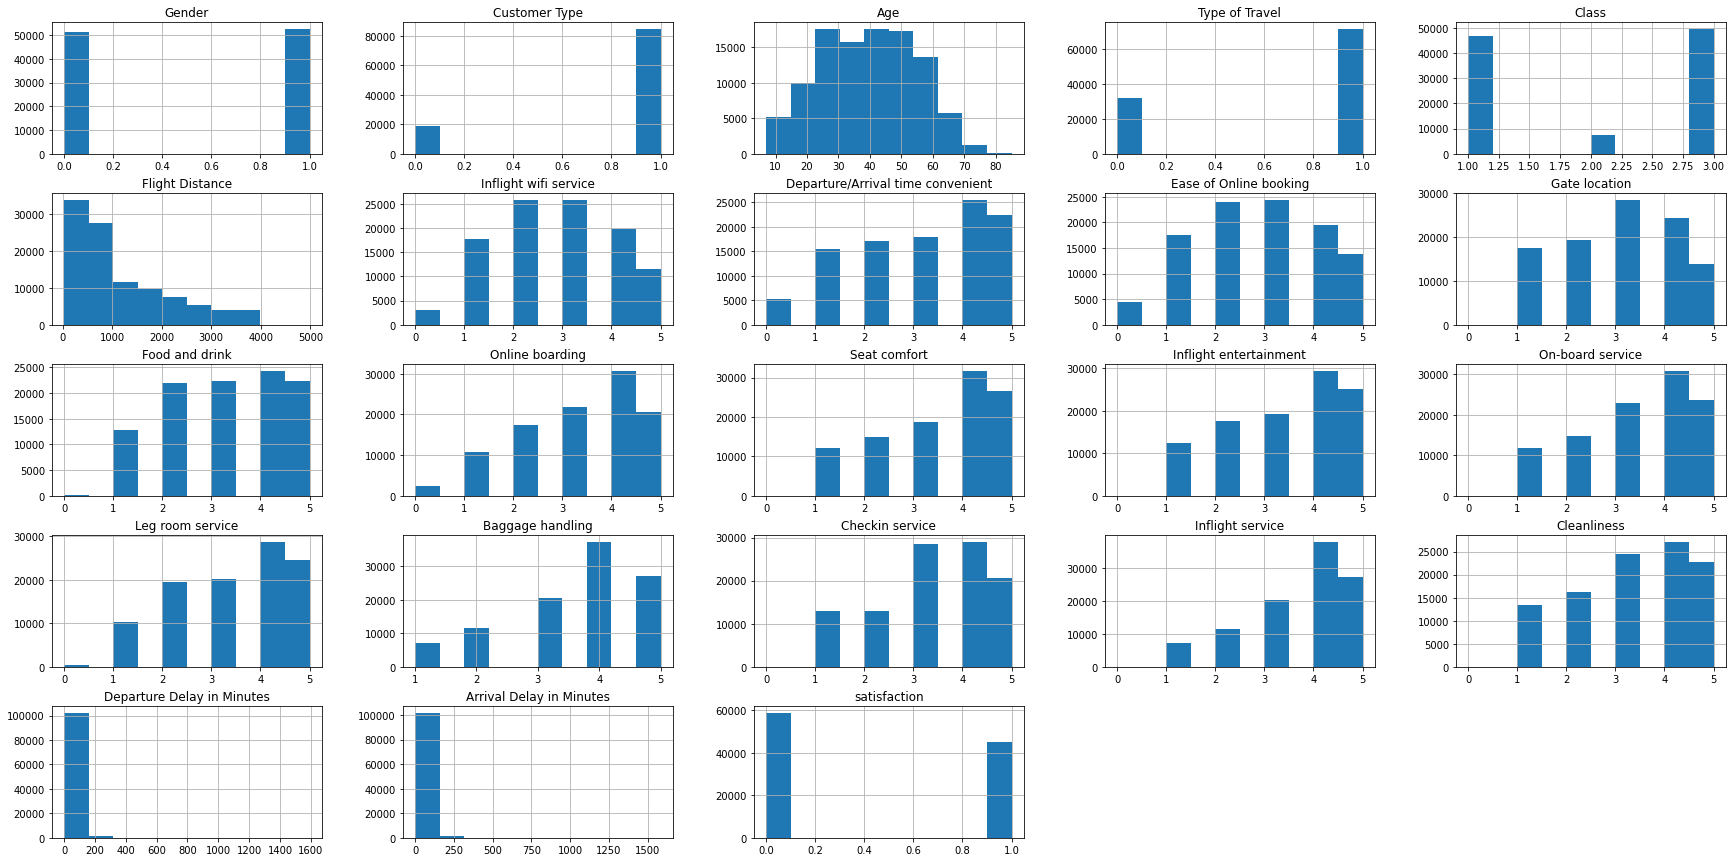

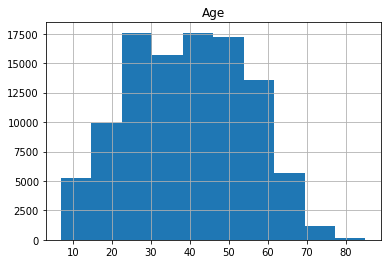

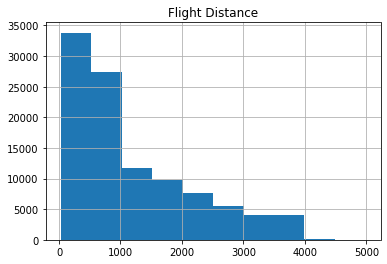

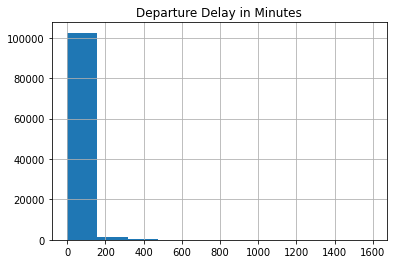

In [54]:
# Alle kolommen een histogram
df.hist(figsize = (30,15))

# Boxplot van de Flight Distance kolom
import seaborn as sns
sns.boxplot(x=df['Flight Distance'])

# Histogrammen per kolom
df.hist(column = "Age")
df.hist(column = "Flight Distance")
df.hist(column = "Departure Delay in Minutes")


#### Check of de data een normaal verdeling heeft met Shapiro-wilk

In [55]:
shapiro = stats.shapiro(df.Class)
print(shapiro.pvalue)

0.0


/home/baz/PycharmProjects/jupyter_notebook/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Transformeer naar z-scores

In [56]:
scale = StandardScaler()
z_score = pd.DataFrame(scale.fit_transform(df), columns=df.columns)

#### Maak een heatmap met alle variabelen

<AxesSubplot:>

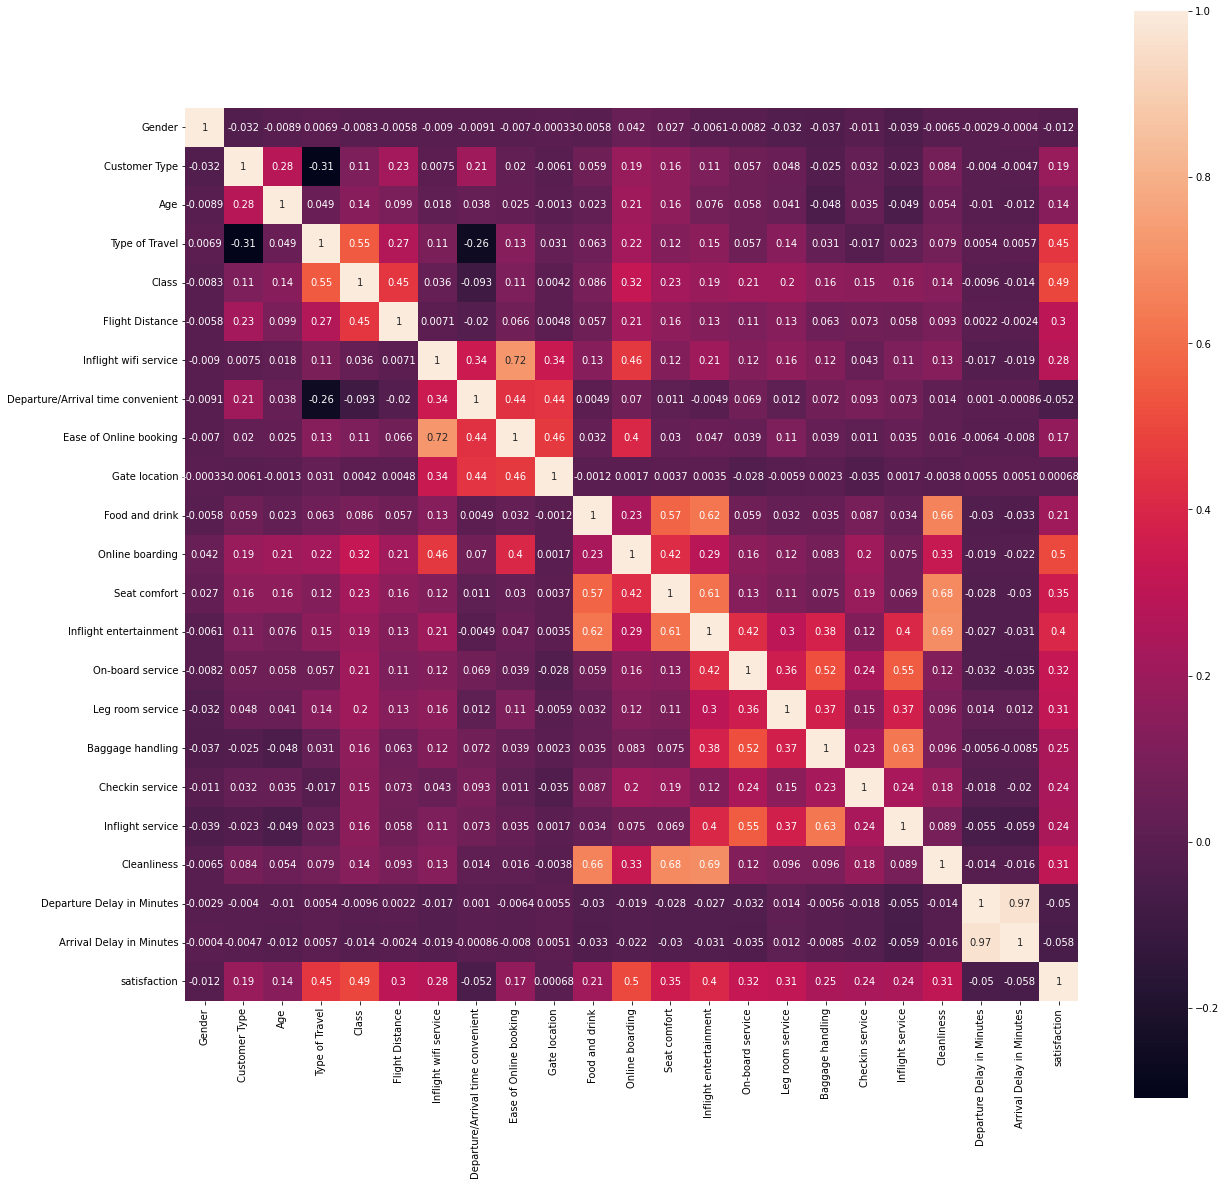

In [57]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), square=True, annot=True)

#### Maak een scatter-matrix met Age, Flight Distance, Departure delay en arrival delay

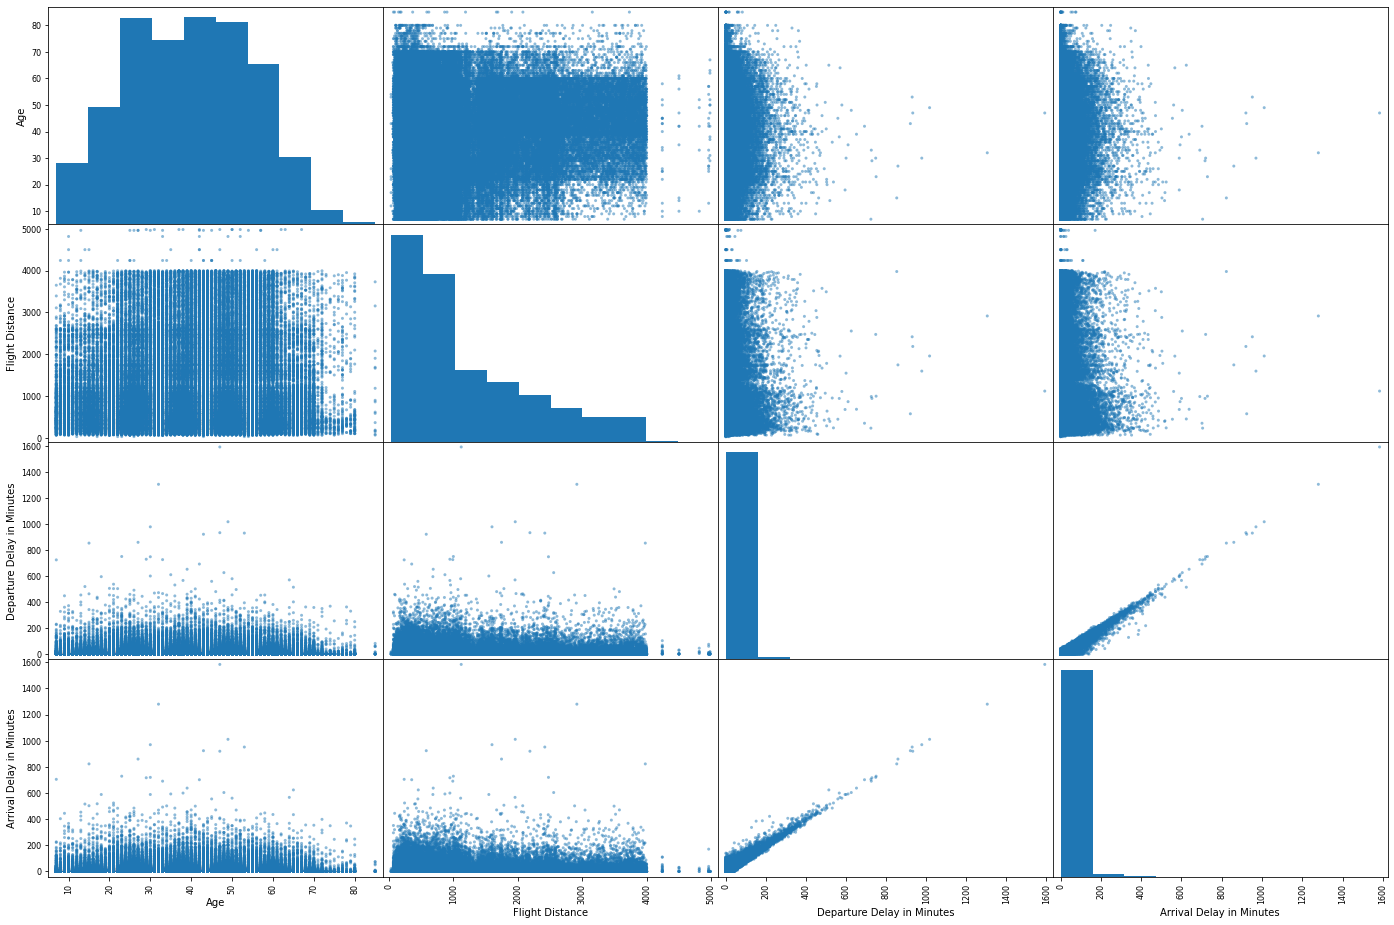

In [58]:
features = ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
scatter_matrix(df[features], figsize = (24, 16))
plt.show()

#### Correlaties tussen alle interval variabelen (geen heatmap)

In [59]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                     Gender  Customer Type       Age  \
Gender                             1.000000      -0.031732 -0.008928   
Customer Type                     -0.031732       1.000000  0.281674   
Age                               -0.008928       0.281674  1.000000   
Type of Travel                     0.006909      -0.308333  0.048524   
Class                             -0.008253       0.105735  0.140565   
Flight Distance                   -0.005828       0.225200  0.099461   
Inflight wifi service             -0.008974       0.007543  0.017859   
Departure/Arrival time convenient -0.009142       0.206869  0.038125   
Ease of Online booking            -0.006951       0.019509  0.024842   
Gate location                     -0.000333      -0.006078 -0.001330   
Food and drink                    -0.005772       0.059454  0.023000   
Online boarding                    0.042260       0.189262  0.208939   
Seat comfort                       0.026502       0.159484  0.16

#### Voorspel arrival delay aan de hand van flight distance


In [60]:
# Arrival delay opschonen
df.dropna(inplace=True)

lm = pg.linear_regression(df['Flight Distance'], df['Arrival Delay in Minutes'])
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,15.29,0.19,81.71,0.00,0.0,-0.0,14.92,15.66
1,Flight Distance,-0.00,0.00,-0.78,0.43,0.0,-0.0,-0.00,0.00


#### Voorspel arrival delay aan de hand van flight distance, leeftijd en departure delay

In [61]:
lm = pg.linear_regression(df[['Flight Distance', 'Departure Delay in Minutes','Age']], df['Arrival Delay in Minutes'])
lm.round(2)



,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.11,0.09,11.88,0.00,0.93,0.93,0.92,1.29
1,Flight Distance,-0.00,0.00,-5.01,0.00,0.93,0.93,-0.00,-0.00
2,Departure Delay in Minutes,0.98,0.00,1193.11,0.00,0.93,0.93,0.98,0.98
3,Age,-0.00,0.00,-2.39,0.02,0.93,0.93,-0.01,-0.00
